<h1 style="text-align: center;">Набор данных о раке молочной железы</h1>

*Характеристики ядер, полученные на основе оцифрованных изображений тонкоигольного аспирата (FNA) опухоли молочной железы. Они описывают характеристики ядер клеток, присутствующих на изображении.*

<h3 style="text-align: center;">Распеределние задач</h3>

**Лунегов Никита Иванович**

1. описание проекта + распределение задач + контроль над процессом
2. создания репозитория + дать возможность всем редактировать
3. создание ER-диаграммы
4. проверка скриптов базы данных

**Жук Арсений Андреевич**

1. создать скрипт python для визуализации данных (разные параметры)
2. создавать в Jupyter Notebook
3. после диаграмм необходимо сформировать вывод

**Кузьмин Артём Дмитриевич**

1. проверка диаграммы базы данных
2. создание БД (написание скрипта)
3. импорт данных и их обработка

**Дряблова Екатерина Игоревна**

1. разобраться с Docker
2. проверка выводов по графикам в юпитере

**Денисов Дмитрий Александрович**

1. развернуть базу на db4free.net
2. оценка полезности и информативности диграмм в юпитере

<h3 style="text-align: center;">Визуализация данных</h3>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

sns.set(rc={'figure.figsize':(12,7)})

Загрузка таблица и изучение её содержимого

In [3]:
df = pd.read_csv('data.csv')
df = df.replace({'diagnosis':{'M':1, 'B':0}}) # переименовываем злокачественные клетки в 1, а доброкачественные в 0
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**1. Строим тепловую карту корреляции параметров, чтобы в дальнейшем понимать какие графики нам дадут полезную информацию, а какие нет**

Благодаря этой карте мы можем понять какие параметры можно было бы исключить при дальнейшем исследовании. Например, если бы мы в дальнейшем работали с алгоритмами машинного обучения, то можно было бы удалить параметры: texture_mean и fractal_dimension_mean, чтобы обучение нашей модели было более качественным.

Также, из этой карты и графиков ниже, мы видим, что с диагнозом коррелируют в основном параметры, связанные с размером клетки.

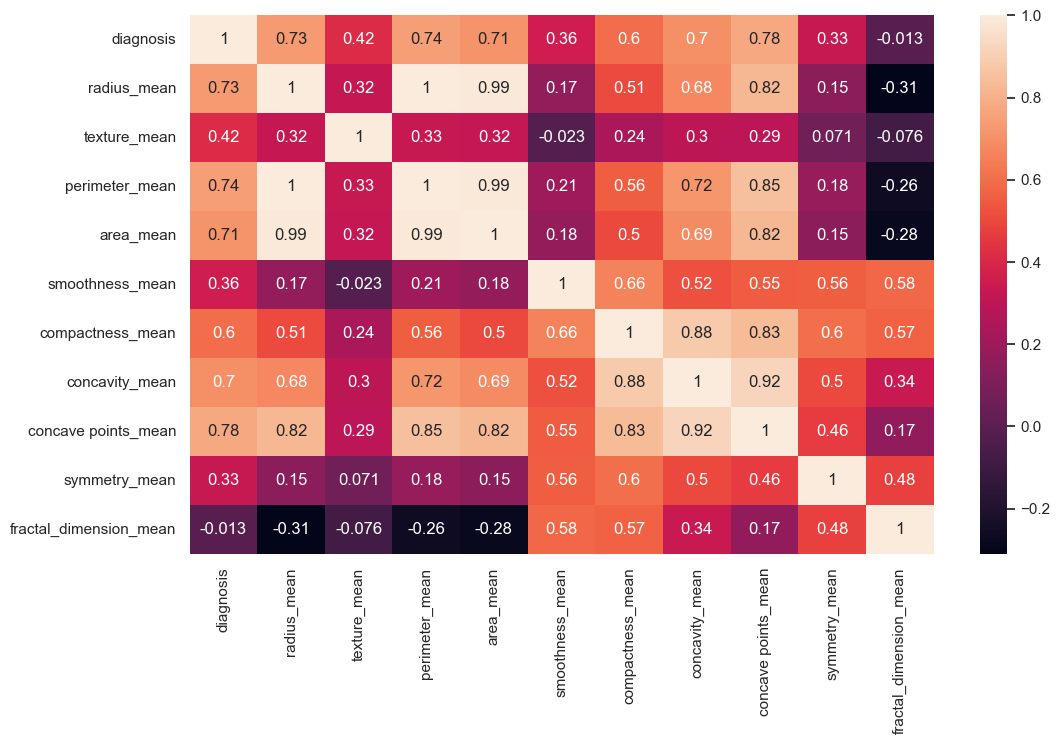

In [4]:
sns.heatmap(df[df.columns[1:12]].corr(), annot=True);

**2. Примеры полезных графиков, которые дают нам информацию о знаке корреляции**

На них мы видим положительный коэффициент корреляции, который говорит нам о том, что при увеличении одного параметра, увеличивается и другой

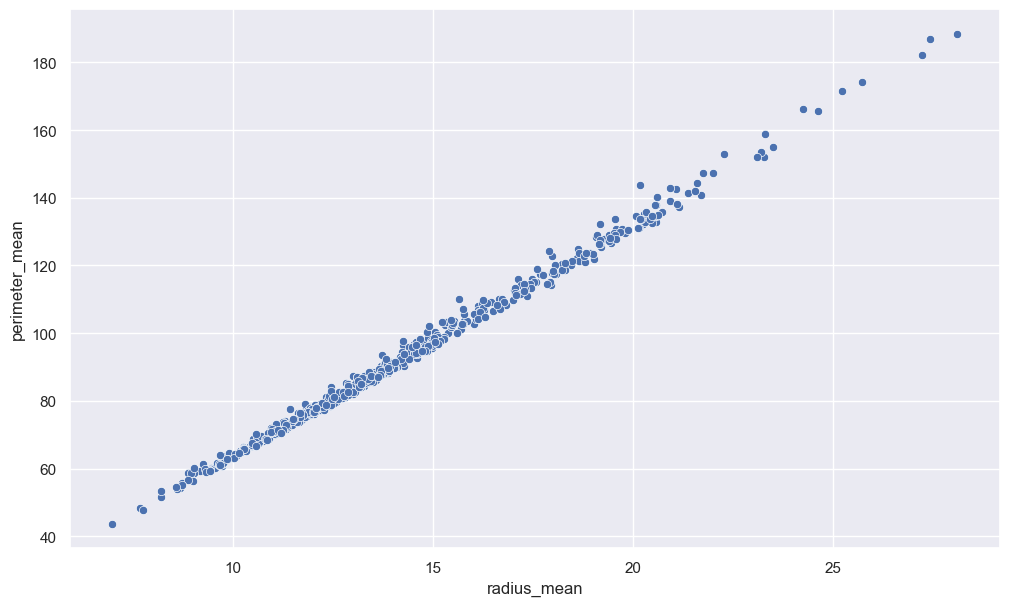

In [27]:
sns.scatterplot(df, x="radius_mean", y="perimeter_mean");

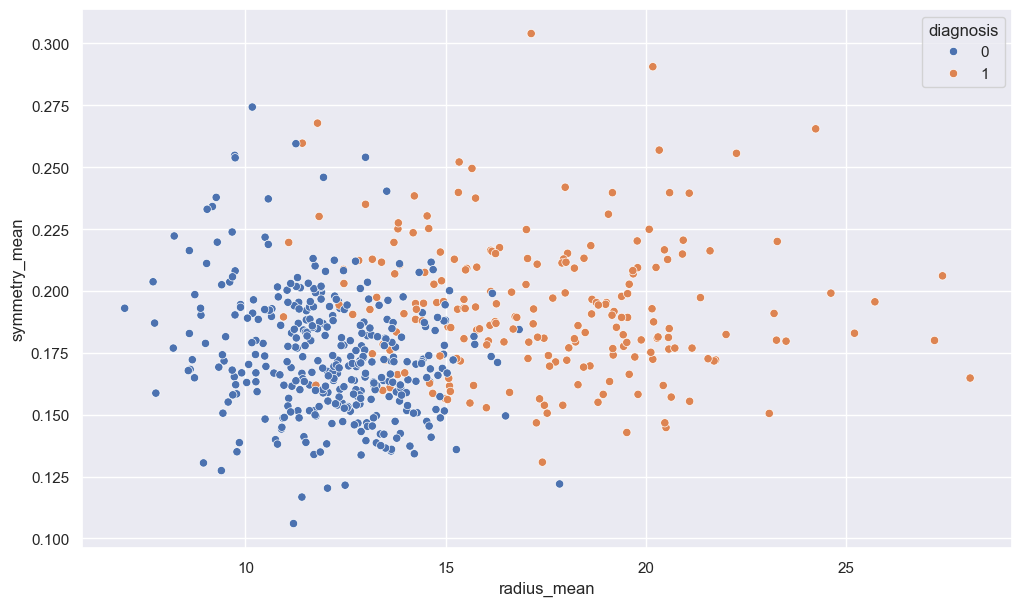

In [26]:
sns.scatterplot(df, x="radius_mean", y="symmetry_mean", hue='diagnosis');

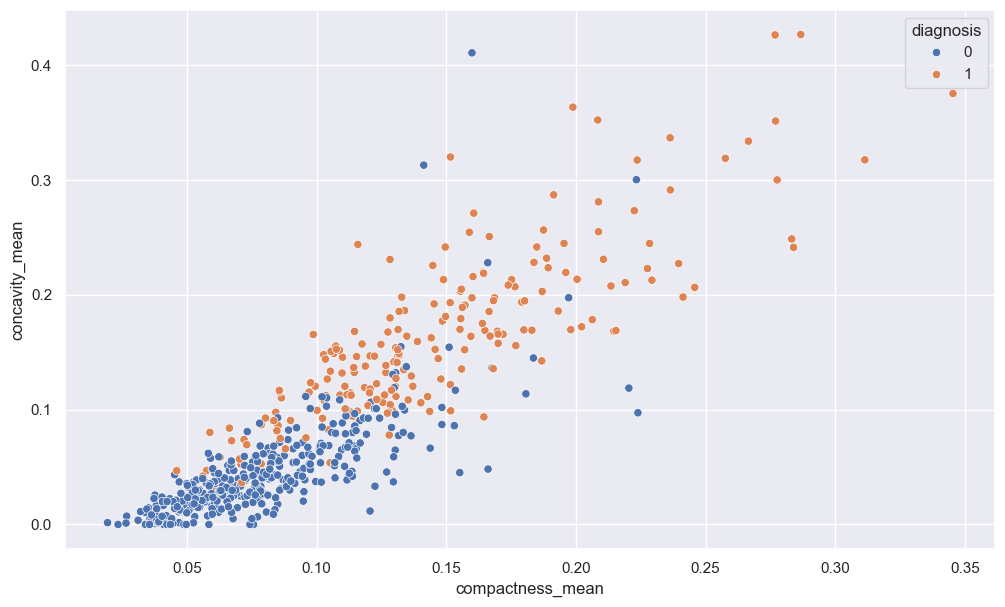

In [28]:
sns.scatterplot(df, x="compactness_mean", y="concavity_mean", hue='diagnosis');

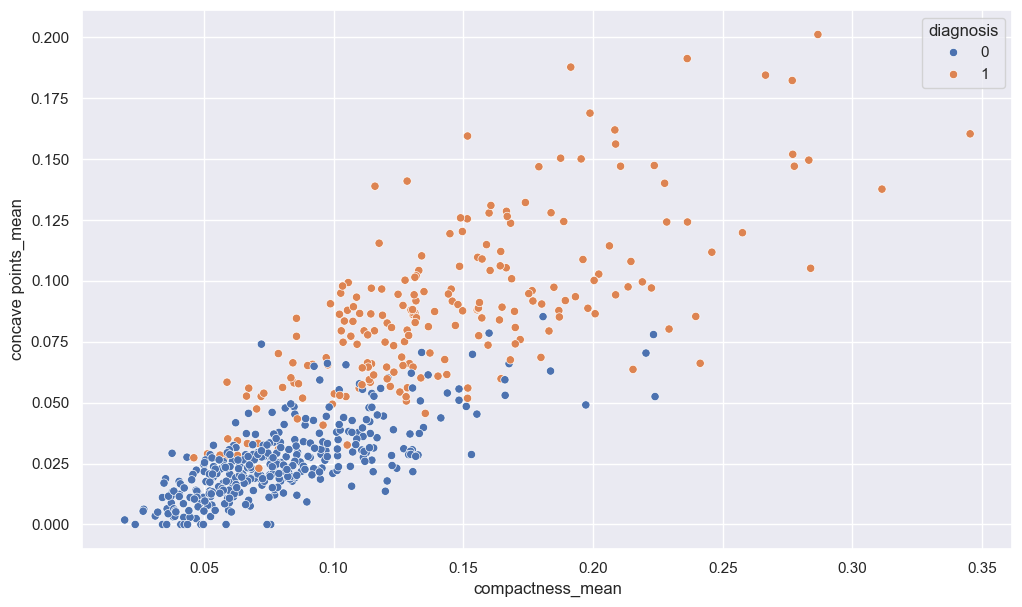

In [29]:
sns.scatterplot(df, x="compactness_mean", y="concave points_mean", hue='diagnosis');

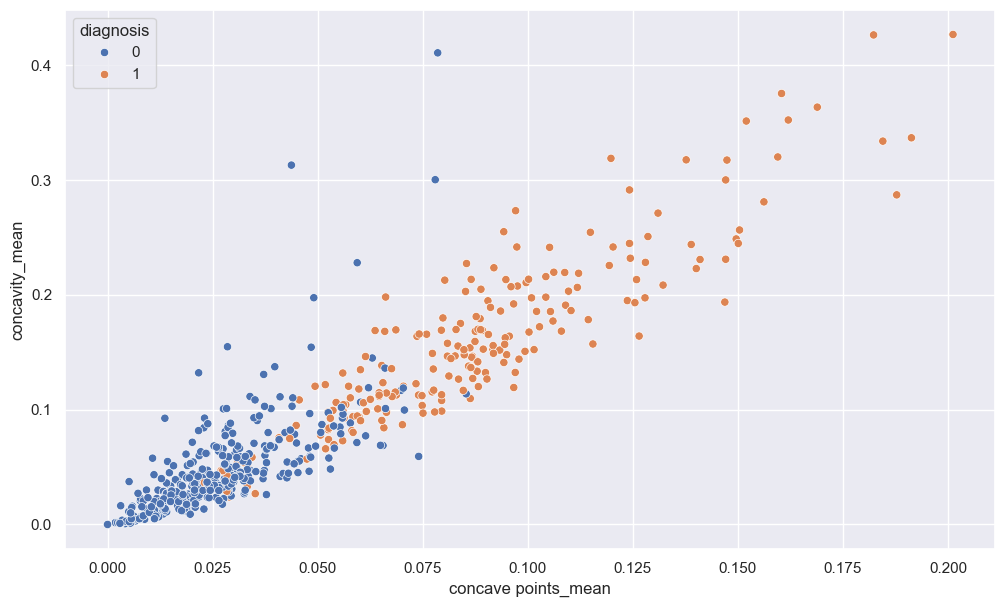

In [30]:
sns.scatterplot(df, x="concave points_mean", y="concavity_mean", hue='diagnosis');

**3. Примеры бесполезных графиков, которые не дают нам информацию о знаке корреляции**

С этих графиков мы не можем получить никакой информации о зависимости параметров

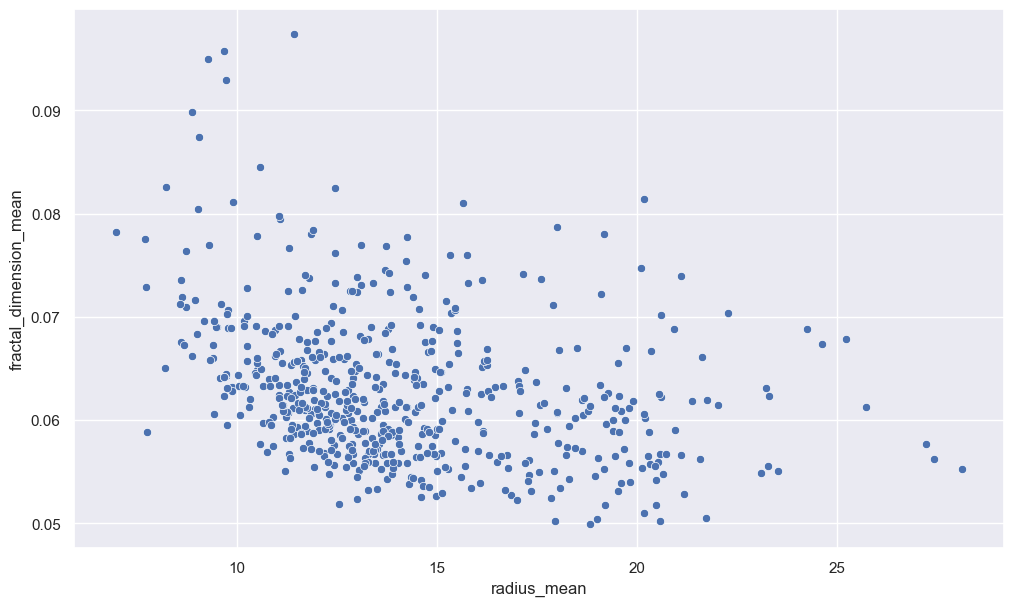

In [31]:
sns.scatterplot(df, x="radius_mean", y="fractal_dimension_mean");

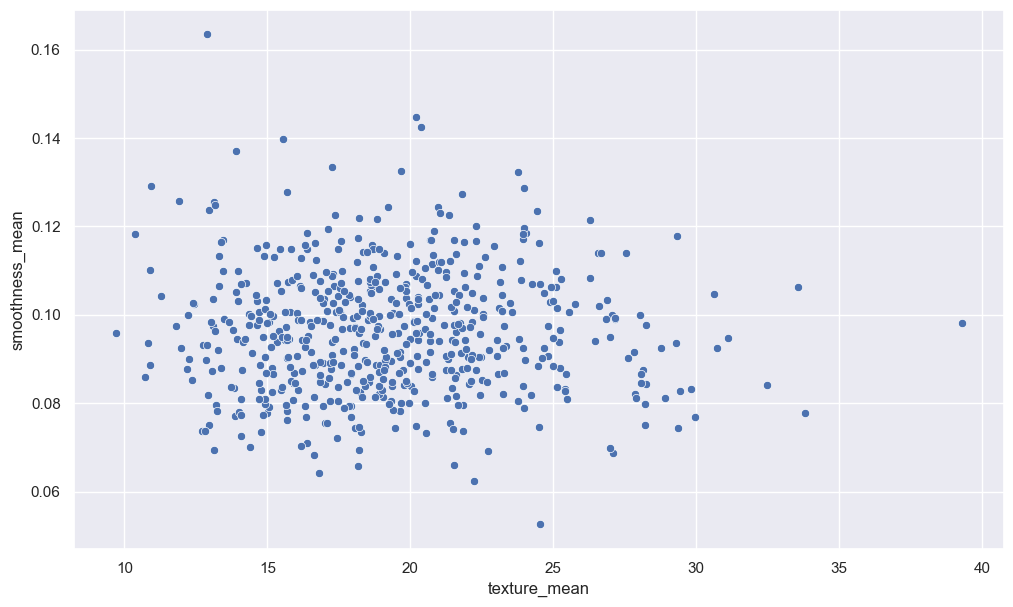

In [32]:
sns.scatterplot(df, x="texture_mean", y="smoothness_mean");

График, представленный ниже, можно считатать бесполезным, так как на нём мы наблюдаем большое количество выбросов, которые не дают нам в точности увидеть зависимость параметров.

C:\Users\ars4z\AppData\Local\Temp\ipykernel_10012\209445344.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='diagnosis', y='texture_mean', palette="Set2").set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средняя текстура');
C:\Users\ars4z\AppData\Local\Temp\ipykernel_10012\209445344.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.boxplot(df, x='diagnosis', y='texture_mean', palette="Set2").set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средняя текстура');


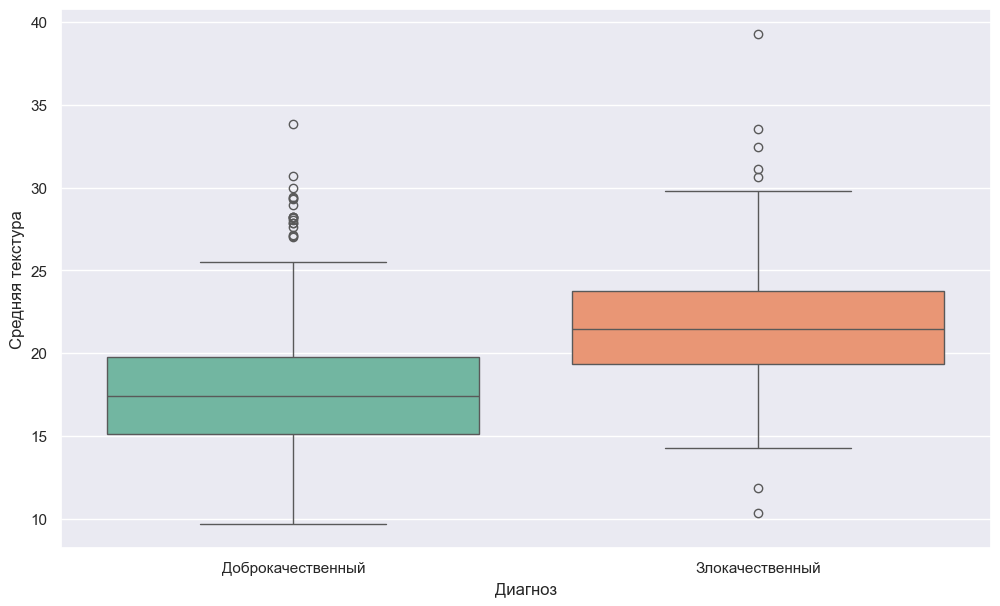

In [33]:
sns.boxplot(df, x='diagnosis', y='texture_mean', palette="Set2").set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средняя текстура');
# текстурой будем называть стандартное отклонение значений шкалы серого

Из трёх графиков ниже мы видим, что, в среднем, размер злокачественной клетки больше, чем доброкачественной. Это наблюдается по всем параметрам: радиусу, периметру, площади.

C:\Users\ars4z\AppData\Local\Temp\ipykernel_10012\1962940364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='diagnosis', y='radius_mean', palette="Set2").set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средний радиус');
C:\Users\ars4z\AppData\Local\Temp\ipykernel_10012\1962940364.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.boxplot(df, x='diagnosis', y='radius_mean', palette="Set2").set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средний радиус');


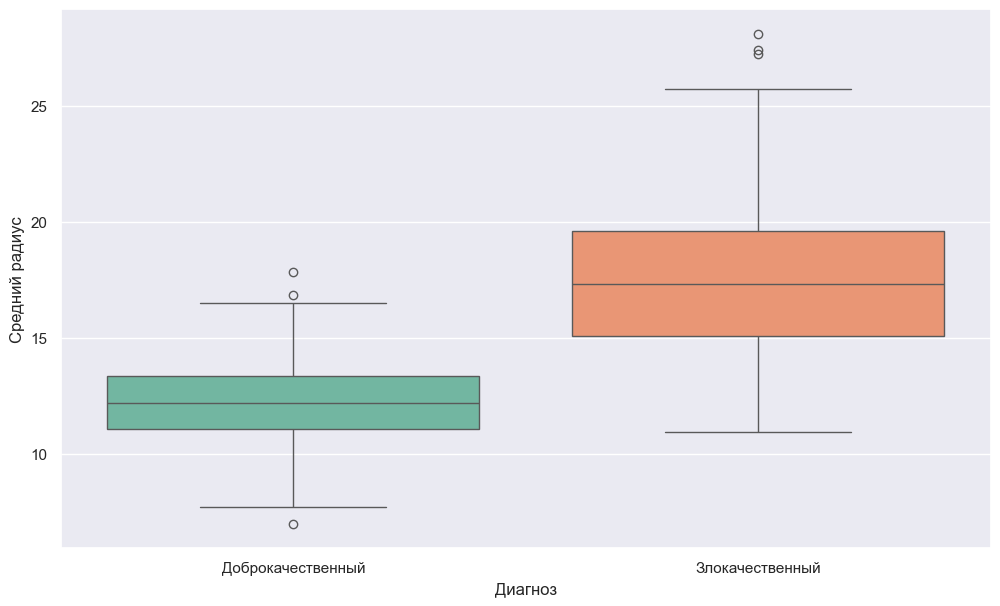

In [34]:
sns.boxplot(df, x='diagnosis', y='radius_mean', palette="Set2").set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средний радиус');

C:\Users\ars4z\AppData\Local\Temp\ipykernel_10012\148239149.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(df, x='diagnosis', y='perimeter_mean', palette='husl').set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средний периметр');
C:\Users\ars4z\AppData\Local\Temp\ipykernel_10012\148239149.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.swarmplot(df, x='diagnosis', y='perimeter_mean', palette='husl').set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средний периметр');


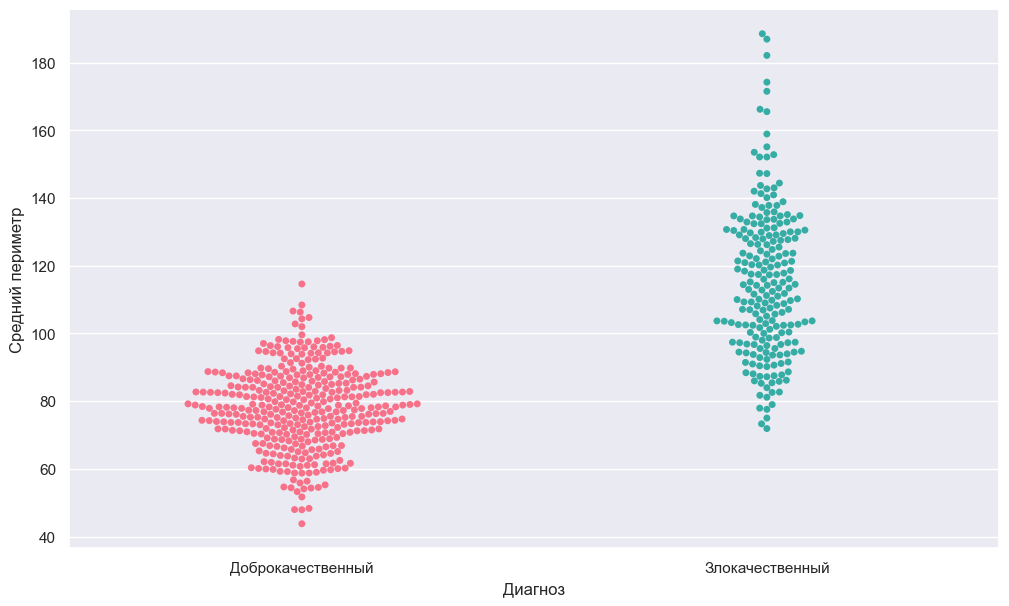

In [35]:
sns.swarmplot(df, x='diagnosis', y='perimeter_mean', palette='husl').set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средний периметр');

C:\Users\ars4z\AppData\Local\Temp\ipykernel_10012\1139276404.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.barplot(df, x='diagnosis', y='area_mean').set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средняя площадь');


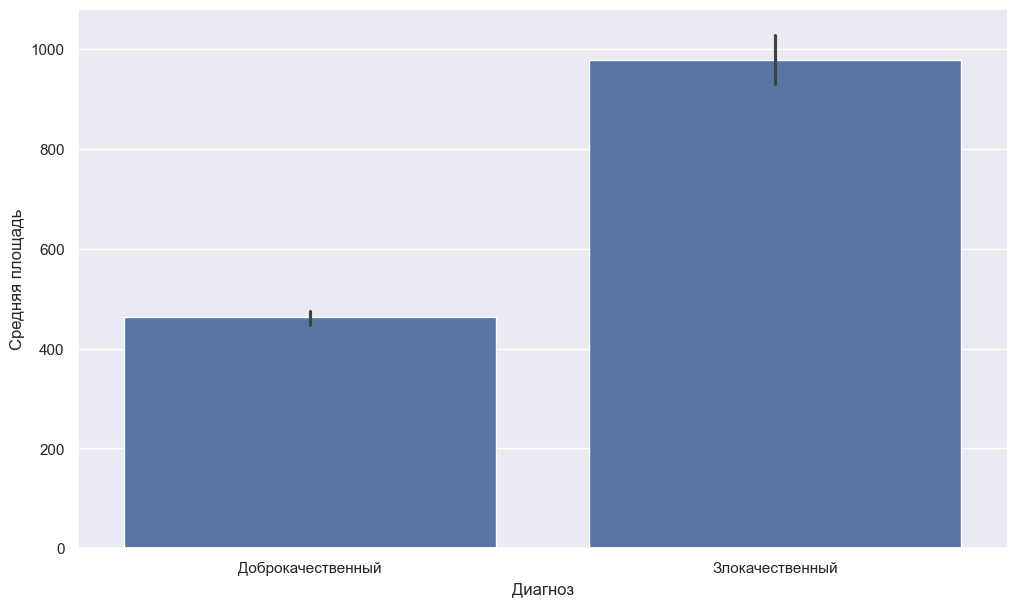

In [36]:
sns.barplot(df, x='diagnosis', y='area_mean').set(xticklabels=["Доброкачественный", "Злокачественный"], xlabel='Диагноз', ylabel='Средняя площадь');

На графиках ниже мы видим, что основное количество вогнутых участков контура (вогнутых точек) у доброкачественных клеток сосредоточено в интервале от 0 до 0.05 штук на клетку, в то время как у злокачественных клеток достаточно растянутый график, на котором видно, что количество вогнутых точек на одну клетку сильно колеблется

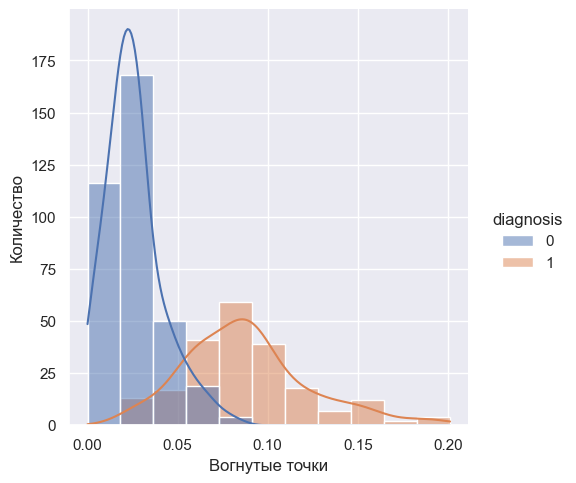

In [83]:
bins = math.ceil(1 + 3.332*np.log10(len(df)))
sns.displot(df, x='concave points_mean', hue = 'diagnosis', bins=bins, kde='True').set(xlabel='Вогнутые точки', ylabel='Количество');

Похожую картину мы можем наблюдать у текстуры и гладкости клеток

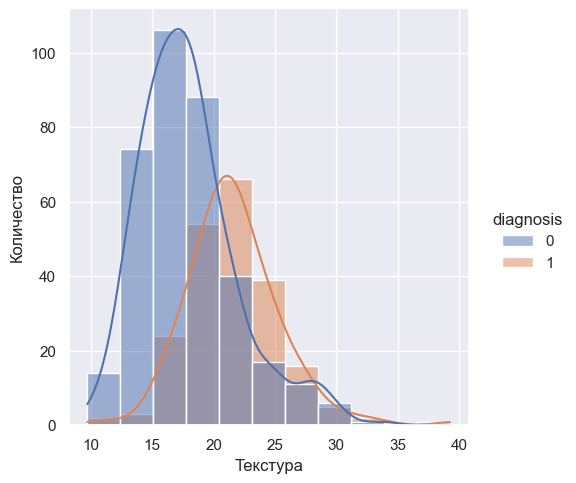

In [82]:
bins = math.ceil(1 + 3.332*np.log10(len(df)))
sns.displot(df, x='texture_mean', hue = 'diagnosis', bins=bins, kde='True').set(xlabel='Текстура', ylabel='Количество');

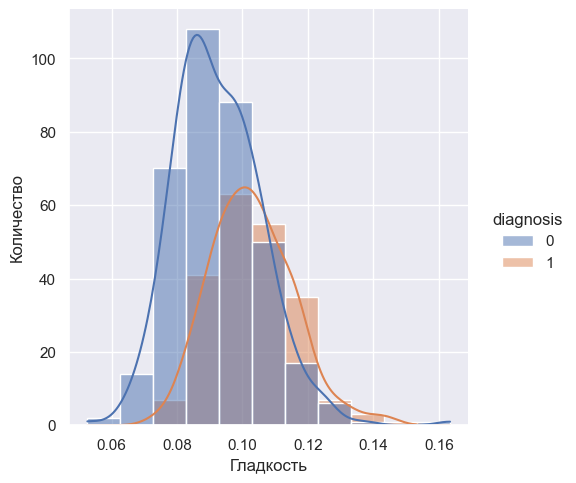

In [81]:
bins = math.ceil(1 + 3.332*np.log10(len(df)))
sns.displot(df, x='smoothness_mean', hue = 'diagnosis', bins=bins, kde='True').set(xlabel='Гладкость', ylabel='Количество');

Из диаграммы ниже можно сделать вывод, что чаще всего встречается доброкачественная опухоль

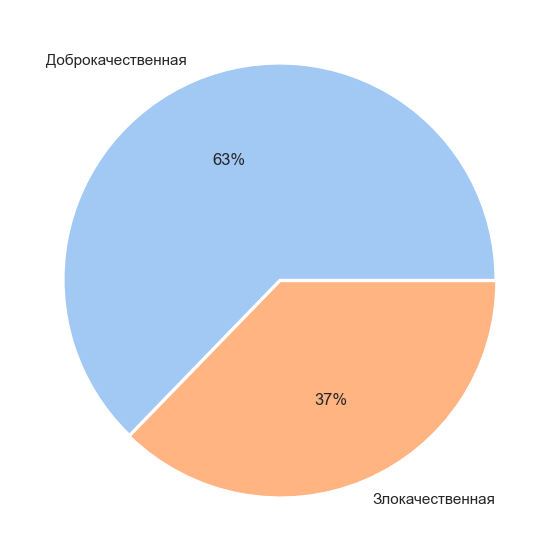

In [79]:
data = [df[df.diagnosis == 0].id.count(), df[df.diagnosis == 1].id.count()]
labels = ['Доброкачественная', 'Злокачественная']
colors = sns.color_palette('pastel')
explode = [0, 0.01]
plt.pie(data, labels=labels, colors = colors, explode=explode, autopct='%.0f%%');

Самара 2023